# Métodos de aplicação
#### Para modelagem e análise preditiva com machine learning existem dois modelos (classificação e regressão)

- Classificação: é um algoritmo supervisionado de machine learning usado para prever a categoria de uma observação dada
- Regressão linear é um algoritmo supervisionado de machine learning usado para estimar o valor de algo baseado em uma série de outros dados históricos, portanto olhando para o passado você pode “prever” o futuro

###### Diferenças sobre eles: Sua principal diferença consiste na saída do modelo: na Classificação o resultado é categórico(exemplo: sim ou não) e na Regressão, o resultado é numérico e contínuo (qual a previsão das vendas no proxímo semestre?)
------

# Projeto - Modelagem Preditiva com Regressão no Consumo de Cerveja - SP 
### Link do dataset: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo?datasetId=28454
------
### Breve apresentação do case

A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde happy hour até grandes festas de casamento. Só de pensar já dá vontade de tomar uma cervejinha, você não está sozinho.
A verdade é que ao redor do mundo, milhares de pessoas consomem a bebida regularmente e também em diversas situações. Mas você já parou para pensar quais são os países que mais consomem cerveja no mundo? O primeiro que veio à sua cabeça foi a Alemanha? Bem, saiba que não é assim.
A resposta a essa pergunta é contundente: a República Tcheca. Segundo pesquisa da empresa japonesa de bebidas Kirin, o país está no topo da tabela de consumo per capita de cerveja há 23 anos consecutivos.
Em 2015, o ano mais recente para o qual existem estatísticas, os tchecos beberam 142,4 litros por pessoa. Isso é o equivalente a 250 litros - ou um a cada 35 horas. Mas, dado que é improvável que menores de idade contribuam para esse número, é seguro assumir que o bebedor médio de cerveja provavelmente bebe um pouco mais.
Atrás da República Tcheca estão os pretendentes de sempre. Áustria e Alemanha vêm em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em segundo lugar estão as Seychelles, uma classificação elevada que atribuiremos ao clima quente e ao grande número de veraneantes.Os dados (amostra) foram coletados em São Paulo — Brasil, em uma área universitária, onde há algumas festas com turmas de alunos de 18 a 28 anos (média). 

# Bibliotecas 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

## Análise Exploratoria do Dataset

In [21]:
#carregamento dos dados
dados_cervejas= pd.read_csv('Consumo_cerveja.csv', sep = ';')
dados_cervejas

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [22]:
# aplico o info para ver se o dataser tem dados null ou faltantes 
dados_cervejas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [23]:
#Aplico o describe com essa função é aplicado uma estatistica descritiva nos dados ajudando a descrever e resumir o dataset, nenhum número descrepante foi encontrado
dados_cervejas.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação 
- Aplico no dataset a matriz de correlação que é importante para entender as relação das variavéis em si, sendo -1(associação negativa) ou +1(associação positiva) 
- Correlações positivas indicam que as duas variáveis se movem na mesma direção e correlações negativas indicam uma relação oposta.

In [24]:
#aplico a correlação no dataset

dados_cervejas.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


<AxesSubplot:>

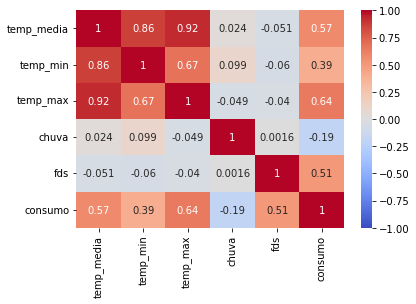

In [25]:
sns.heatmap(dados_cervejas.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## Distribuição de frequência
#### Vou aplicar aqui também uma visualização de histograma, isso porque na modelagem preditiva assume em alguns momento que a variavél dependente segue uma distribuição continua, mas muitas vezes com dados reais isso não se aplica 

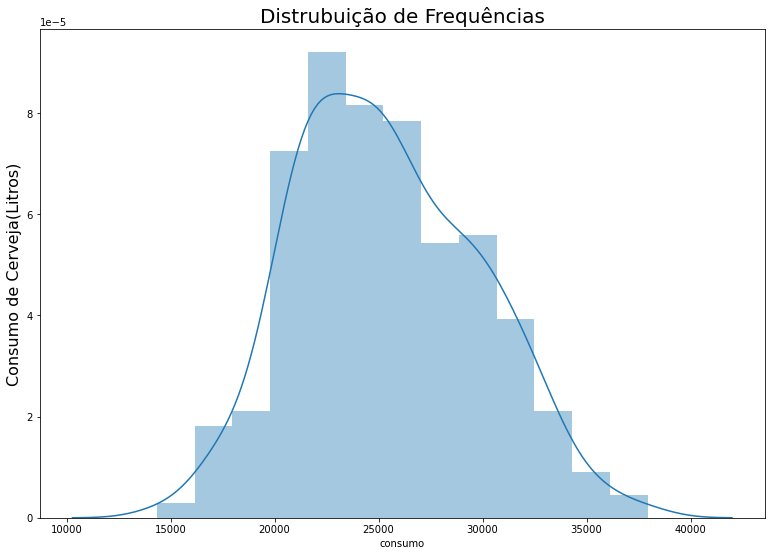

In [26]:
#a  distribuição aparenta estar continua e sem discrepãncia

ax = sns.distplot(dados_cervejas['consumo'])
ax.figure.set_size_inches(13, 9)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

warnings.filterwarnings('ignore')

## Análise da Variavél  dependente
##### aplico uma visualização com box-plot que possibilida encontrar outliers e também entender a distribuicao da mediana dessa variavel dependente 

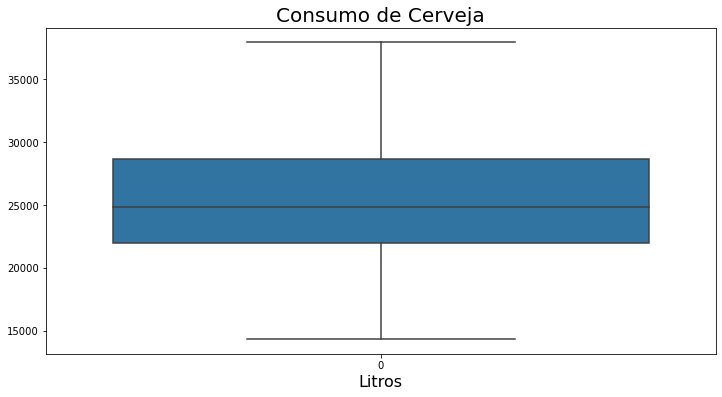

In [27]:
#visualização com boxplot 

ax = sns.boxplot(data=dados_cervejas['consumo'], orient='v')
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)


warnings.filterwarnings('ignore')

## Variável dependente e Variáveis explicativas
##### Até esse momento no dataset, consigo identificar que minha variavél dependente (consumo) tem forte correlação com as minhas variavéis independentes( temp_media, tem_max, fds, chuva)

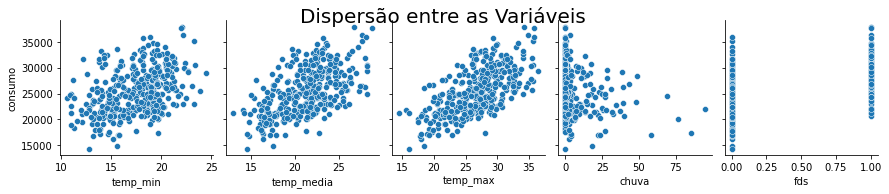

In [28]:
#ploto as variaveis, consigo compreender aqui que o mais proxímo de uma regressão é tempe_max, 

ax = sns.pairplot(dados_cervejas, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.04)
ax

warnings.filterwarnings('ignore')

# Modelo Machine Learning com aprendizado supervisionado

- A modelagem de regressão trata de um estudo para prever o valor médio de uma variável com base no valor de outra.  A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.

## Separação dos dados

In [29]:
# importo a classe/package que ira separar os dados de treino e teste
from sklearn.model_selection import train_test_split

#aplico a separacao
y= dados_cervejas['consumo']
X= dados_cervejas[['temp_max', 'chuva', 'fds']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Treinamento do modelo 

In [31]:
# importo a classe/package da regressão linear e as métricas para o modelo
from sklearn.linear_model import LinearRegression
from sklearn import metrics


#instancio o modelo
modelo = LinearRegression()


#Crio o modelo
modelo.fit(X_train, y_train)


LinearRegression()

# Previsões Pontuais que podem ser analisadas

In [31]:
# primeiro registro do teste 
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [34]:
#estimavas que podem ser alteradas
temp_max=12.0
chuva= 0
fds= 1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

19569.90 litros


## Coeficiente de determinação dos dados de treino
##### O R-quadrado é uma medida estatística que explica o quão próximo os dados estão da linha de regressão ajustada,  com essa medida eu consigo determinar quão bem o meu modelo se ajustou aos dados

In [39]:
#calculo o score, modelo vai de 0 a 1 
#logica R-quadrado = Variação explicada/Variação total

print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


## Coeficiente de determinação dos dados de teste

In [40]:
#variavél que recebe o modelo com meu X_test
previsao = modelo.predict(X_test)


#explicacao dos resultados dos meus Y
print('R² = %s' % metrics.r2_score(y_test, previsao).round(2)) 

#O modelo conseguiu explicar quase 70%  da variação do fenômeno (consumo) pelas variavéis explicativas (temp_max', 'chuva', 'fds')

R² = 0.69


##  Obtendo o intercepto do consumo de cerveja
#### O intercepto representa o efeito médio do Consumo de Cerveja(Variavél Y)  tendo todas as variáveis explicativas excluídas do modelo ou seja, se eu excluir do modelo Temperatura Máxima,Chuva.

In [30]:
#Excluindo as variveis X meu consumo medio de cerveja é de quase 6mil litros
modelo.intercept_

5951.9763393124485

## Coeficiente e Intercept no modelo
#### Aqui eu quero entender qual a variação média que eu tenho no consumo de cerveja se a temperatura max se alterar e as demais variaveis(chuva e finais de semanas permancerem constantes

In [27]:
# os coeficientes das minhas variaveis X (temp_max', 'chuva', 'fds')
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [29]:
#lista nomeando as variaveis X
index=['Intercepto', 'Temperatura Maxima', 'Chuva', "Final de semana"]


#incluo os coeficientes dentro dataframe
modelo_coef = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])
modelo_coef

,Parâmetros
Intercepto,5951.976339
Temperatura Maxima,684.736759
Chuva,-60.782435
Final de semana,5401.083339


### Interpretação dos resultados do modelo 


- Intercepto: Excluindo o efeito das variáveis explicativas ('temp_max', 'chuva', 'fds' ) o efeito médio no Consumo de Cerveja seria de 5951,98 litros (quase 6mil litros)
- Temperatura Máxima: Mantendo os valores da Chuva e Final de Semana constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de 684,74 litros
- Chuva: mantendoos valores de Temperatura Máxima e Final de Semana constantes o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de -60,78 litros.
- Final de Semana: (Sim/Não) Mantendo os valores de Temperatura Máxima e Chuva constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de 5401,08 litros.